In [181]:
import random

production_cost=3
market_price= 10

# Define the range of prices in Euros
prices = list(range(1, 13))  # This creates a list from 1€ to 12€

# Define the range of quality ratings
qualities = list(range(5))  # This creates a list from 0 to 4

# Create a list of tuples where each tuple is a combination of price and quality
price_quality_combinations = [(price, quality) for price in prices for quality in qualities]


print(len(price_quality_combinations))

# Calculate supplier and buyer profits for each price-quality combination
supplier_profits = {}
buyer_profits = {}

for price, quality in price_quality_combinations:
    # Calculate supplier profit based on given formula
    profit_supplier = price - production_cost - quality
    supplier_profits[(price, quality)] = profit_supplier
    
    # Calculate buyer profit based on given formula
    profit_buyer = market_price - price + quality
    buyer_profits[(price, quality)] = profit_buyer



60


In [186]:
# Initialize a list to hold the Pareto efficient combinations
pareto_efficient_combinations = []

# Iterate through each combination to evaluate efficiency
for combination in price_quality_combinations:
    price, quality = combination
    supplier_profit = supplier_profits[combination]
    buyer_profit = buyer_profits[combination]
    
    # Calculate collective profit and absolute difference
    collective_profit = supplier_profit + buyer_profit
    abs_difference = abs(supplier_profit - buyer_profit)
    
    # Check if the combination is Pareto efficient
    is_pareto_efficient = True
    for other_combination in price_quality_combinations:
        if other_combination == combination:
            continue
        other_supplier_profit = supplier_profits[other_combination]
        other_buyer_profit = buyer_profits[other_combination]
        
        other_collective_profit = other_supplier_profit + other_buyer_profit
        other_abs_difference = abs(other_supplier_profit - other_buyer_profit)
        
        # Pareto efficiency condition: no other combination should be better in both objectives
        if (other_collective_profit > collective_profit and other_abs_difference <= abs_difference) or \
           (other_collective_profit >= collective_profit and other_abs_difference < abs_difference):
            is_pareto_efficient = False
            break
    
    if is_pareto_efficient:
        pareto_efficient_combinations.append((price, quality, supplier_profit, buyer_profit))


In [183]:
# Print the Pareto efficient combinations
for combo in pareto_efficient_combinations:
    price, quality, supplier_profit, buyer_profit = combo
    print(f"Price: {price}€, Quality: {quality}, Supplier Profit: {supplier_profit}, Buyer Profit: {buyer_profit}")

# Extract only the price and quality from pareto_efficient_combinations
pareto_efficient_combinations_without_profit = [(price, quality) for price, quality, _, _ in pareto_efficient_combinations]


Price: 6€, Quality: 0, Supplier Profit: 3, Buyer Profit: 4
Price: 7€, Quality: 0, Supplier Profit: 4, Buyer Profit: 3
Price: 7€, Quality: 1, Supplier Profit: 3, Buyer Profit: 4
Price: 8€, Quality: 1, Supplier Profit: 4, Buyer Profit: 3
Price: 8€, Quality: 2, Supplier Profit: 3, Buyer Profit: 4
Price: 9€, Quality: 2, Supplier Profit: 4, Buyer Profit: 3
Price: 9€, Quality: 3, Supplier Profit: 3, Buyer Profit: 4
Price: 10€, Quality: 3, Supplier Profit: 4, Buyer Profit: 3
Price: 10€, Quality: 4, Supplier Profit: 3, Buyer Profit: 4
Price: 11€, Quality: 4, Supplier Profit: 4, Buyer Profit: 3


In [184]:
pareto_efficient_combinations_without_profit

[(6, 0),
 (7, 0),
 (7, 1),
 (8, 1),
 (8, 2),
 (9, 2),
 (9, 3),
 (10, 3),
 (10, 4),
 (11, 4)]

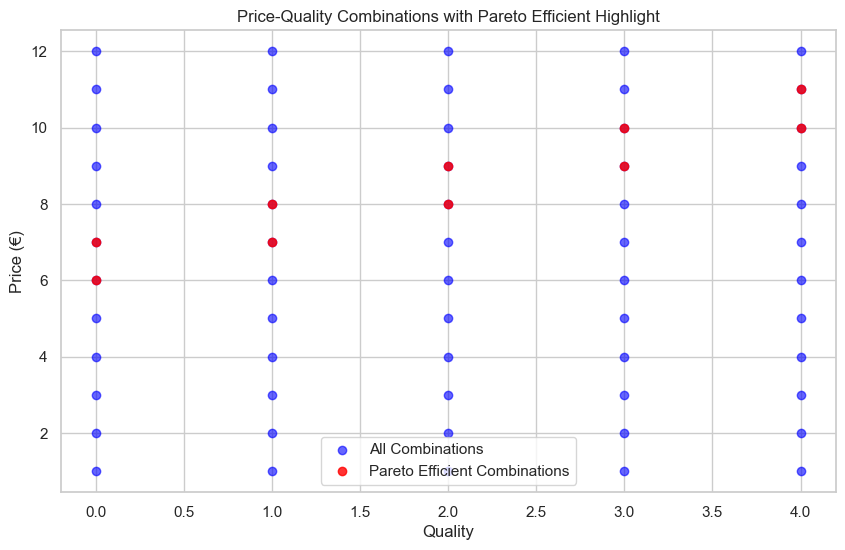

In [148]:
import matplotlib.pyplot as plt
# Extract only the price and quality from pareto_efficient_combinations
pareto_efficient_combinations_without_profit = [(price, quality) for price, quality, _, _ in pareto_efficient_combinations]

# Prepare data for plotting
x_all = [quality for price, quality in price_quality_combinations]
y_all = [price for price, quality in price_quality_combinations]


x_pareto = [quality for price, quality in pareto_efficient_combinations_without_profit]
y_pareto = [price for price, quality in pareto_efficient_combinations_without_profit]


# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_all, y_all, c='blue', label='All Combinations', alpha=0.6)
plt.scatter(x_pareto, y_pareto, c='red', label='Pareto Efficient Combinations', alpha=0.8)
plt.xlabel('Quality')
plt.ylabel('Price (€)')
plt.title('Price-Quality Combinations with Pareto Efficient Highlight')
plt.legend()
plt.grid(True)
plt.show()

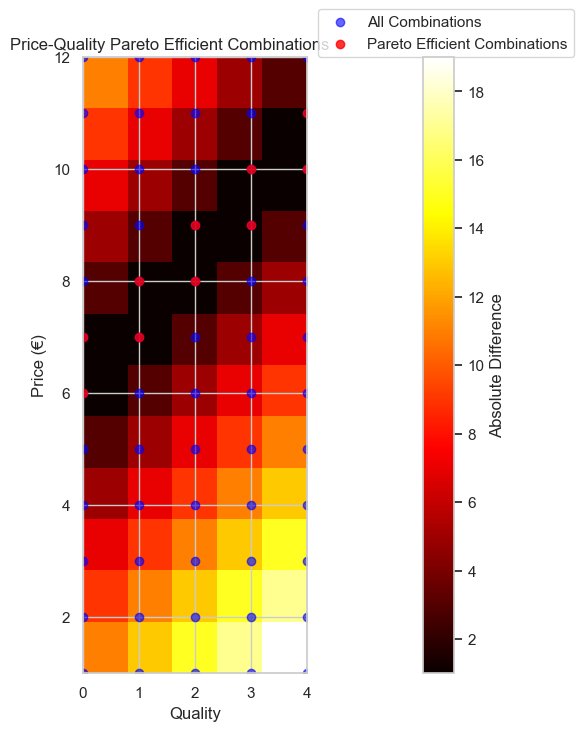

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the range of prices and qualities
prices = list(range(1, 13))  # Prices from 1€ to 12€
qualities = list(range(5))  # Quality ratings from 0 to 4

# Create all possible combinations of price and quality
price_quality_combinations = [(price, quality) for price in prices for quality in qualities]

# Initialize dictionaries for profits
supplier_profits = {}
buyer_profits = {}
abs_differences = {}

# Production cost and market price
production_cost = 3
market_price = 10

# Calculate supplier and buyer profits for each combination
for price, quality in price_quality_combinations:
    supplier_profits[(price, quality)] = price - production_cost - quality
    buyer_profits[(price, quality)] = market_price - price + quality
    abs_differences[(price, quality)] = abs(supplier_profits[(price, quality)] - buyer_profits[(price, quality)])

# Find Pareto efficient combinations
pareto_efficient_combinations = []

for combination in price_quality_combinations:
    price, quality = combination
    supplier_profit = supplier_profits[combination]
    buyer_profit = buyer_profits[combination]
    
    collective_profit = supplier_profit + buyer_profit
    abs_difference = abs(supplier_profit - buyer_profit)
    
    is_pareto_efficient = True
    for other_combination in price_quality_combinations:
        if other_combination == combination:
            continue
        other_supplier_profit = supplier_profits[other_combination]
        other_buyer_profit = buyer_profits[other_combination]
        
        other_collective_profit = other_supplier_profit + other_buyer_profit
        other_abs_difference = abs(other_supplier_profit - other_buyer_profit)
        
        if (other_collective_profit > collective_profit and other_abs_difference <= abs_difference) or \
           (other_collective_profit >= collective_profit and other_abs_difference < abs_difference):
            is_pareto_efficient = False
            break
    
    if is_pareto_efficient:
        pareto_efficient_combinations.append((price, quality, supplier_profit, buyer_profit))

# Extract only the price and quality from pareto_efficient_combinations
pareto_efficient_combinations_without_profit = [(price, quality) for price, quality, _, _ in pareto_efficient_combinations]

# Prepare data for plotting
x_all = [quality for price, quality in price_quality_combinations]
y_all = [price for price, quality in price_quality_combinations]

x_pareto = [quality for price, quality in pareto_efficient_combinations_without_profit]
y_pareto = [price for price, quality in pareto_efficient_combinations_without_profit]

# Prepare heatmap data
heatmap_data = np.zeros((len(prices), len(qualities)))

for (price, quality), abs_diff in abs_differences.items():
    heatmap_data[price-1, quality] = abs_diff

# Create the plot
plt.figure(figsize=(30,8 ))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest', origin='lower', extent=[0, len(qualities)-1, 1, len(prices)])
plt.colorbar(label='Absolute Difference')

# Plot the scatter points
plt.scatter(x_all, y_all, c='blue', label='All Combinations', alpha=0.6)
plt.scatter(x_pareto, y_pareto, c='red', label='Pareto Efficient Combinations', alpha=0.8)

plt.xlabel('Quality')
plt.ylabel('Price (€)')
plt.title('Price-Quality Pareto Efficient Combinations           ')
# Position the legend outside the plot
plt.legend(loc='lower left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.show()



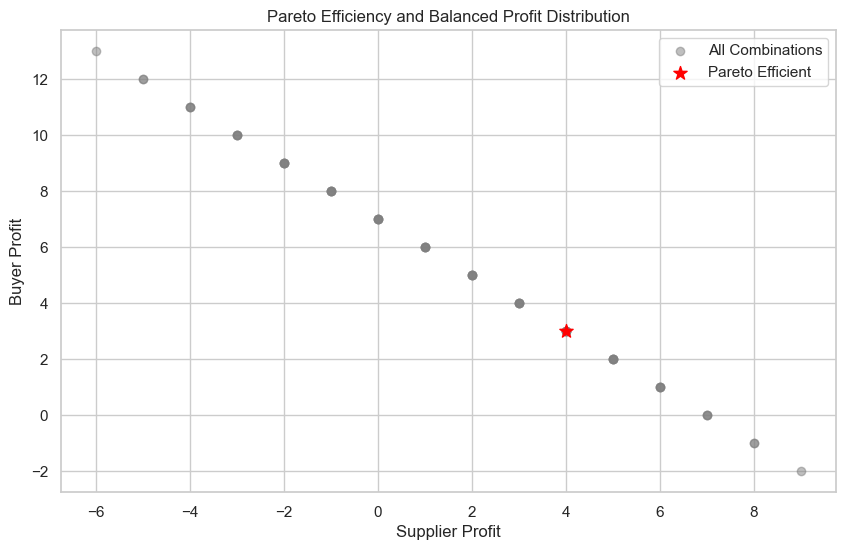

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot all combinations
all_combinations = [(supplier_profits[combo], buyer_profits[combo]) for combo in price_quality_combinations]
x_all, y_all = zip(*all_combinations)
plt.scatter(x_all, y_all, color='gray', alpha=0.5, label='All Combinations')


# Emphasize the most balanced combination
if most_balanced:
    x_balanced, y_balanced = supplier_profits[most_balanced], buyer_profits[most_balanced]
    plt.scatter([x_balanced], [y_balanced], color='red', s=100, marker='*', label='Pareto Efficient')

plt.title('Pareto Efficiency and Balanced Profit Distribution')
plt.xlabel('Supplier Profit')
plt.ylabel('Buyer Profit')
plt.legend()
plt.show()

Testing all combinations of constraints for a list of Efficient Combinations

In [294]:
def pareto_efficient_offer(constrain_of_user, constrain_bot, bot_role='buyer'):
    
    # Define the range of prices in Euros
    prices = list(range(1, 13))  # This creates a list from 1€ to 12€

    # Define the range of quality ratings
    qualities = list(range(5))  # This creates a list from 0 to 4

    # Create a list of tuples where each tuple is a combination of price and quality
    price_quality_combinations = [(price, quality) for price in prices for quality in qualities]

    # Calculate supplier and buyer profits for each price-quality combination
    supplier_profits = {}
    buyer_profits = {}
    for price, quality in price_quality_combinations:
        if bot_role=='buyer':
            profit_buyer = constrain_bot - price + quality
            profit_supplier = price - constrain_of_user - quality
        else:
            profit_buyer = constrain_of_user - price + quality
            profit_supplier = price - constrain_bot - quality

        buyer_profits[(price, quality)] = profit_buyer
        supplier_profits[(price, quality)] = profit_supplier
        
    # Find Pareto Efficient Combinations
    pareto_efficient_combinations = []
    dictionary_of_efficient_offers ={}

    # Iterate through each combination to evaluate efficiency
    for combination in price_quality_combinations:
        price, quality = combination
        supplier_profit = supplier_profits[combination]
        buyer_profit = buyer_profits[combination]
        
        # Calculate collective profit and absolute difference
        collective_profit = supplier_profit + buyer_profit
        abs_difference = abs(supplier_profit - buyer_profit)
        
        # Check if the combination is Pareto efficient
        is_pareto_efficient = True
        for other_combination in price_quality_combinations:
            if other_combination == combination:
                continue
            other_supplier_profit = supplier_profits[other_combination]
            other_buyer_profit = buyer_profits[other_combination]
            
            other_collective_profit = other_supplier_profit + other_buyer_profit
            other_abs_difference = abs(other_supplier_profit - other_buyer_profit)
            
            # Pareto efficiency condition: no other combination should be better in both objectives
            if (other_collective_profit > collective_profit and other_abs_difference <= abs_difference) or \
            (other_collective_profit >= collective_profit and other_abs_difference < abs_difference):
                is_pareto_efficient = False
                break
        if is_pareto_efficient:
            pareto_efficient_combinations.append((price, quality, supplier_profit, buyer_profit))
            dictionary_of_efficient_offers[(price, quality)] = (supplier_profit, buyer_profit)

    if dictionary_of_efficient_offers:
        return dictionary_of_efficient_offers

# Testing all combinations of constraints
bot_constraints = [8, 9, 10]
user_constraints = [1, 2, 3]
results = {}
for bot_constrain in bot_constraints:
    for user_constrain in user_constraints:
        combination_P_Q_Profits = pareto_efficient_offer(user_constrain, bot_constrain)
        results[(bot_constrain,user_constrain)]=combination_P_Q_Profits
        print((bot_constrain,user_constrain),combination_P_Q_Profits)



(8, 1) {(4, 0): (3, 4), (5, 0): (4, 3), (5, 1): (3, 4), (6, 1): (4, 3), (6, 2): (3, 4), (7, 2): (4, 3), (7, 3): (3, 4), (8, 3): (4, 3), (8, 4): (3, 4), (9, 4): (4, 3)}
(8, 2) {(5, 0): (3, 3), (6, 1): (3, 3), (7, 2): (3, 3), (8, 3): (3, 3), (9, 4): (3, 3)}
(8, 3) {(5, 0): (2, 3), (6, 0): (3, 2), (6, 1): (2, 3), (7, 1): (3, 2), (7, 2): (2, 3), (8, 2): (3, 2), (8, 3): (2, 3), (9, 3): (3, 2), (9, 4): (2, 3), (10, 4): (3, 2)}
(9, 1) {(5, 0): (4, 4), (6, 1): (4, 4), (7, 2): (4, 4), (8, 3): (4, 4), (9, 4): (4, 4)}
(9, 2) {(5, 0): (3, 4), (6, 0): (4, 3), (6, 1): (3, 4), (7, 1): (4, 3), (7, 2): (3, 4), (8, 2): (4, 3), (8, 3): (3, 4), (9, 3): (4, 3), (9, 4): (3, 4), (10, 4): (4, 3)}
(9, 3) {(6, 0): (3, 3), (7, 1): (3, 3), (8, 2): (3, 3), (9, 3): (3, 3), (10, 4): (3, 3)}
(10, 1) {(5, 0): (4, 5), (6, 0): (5, 4), (6, 1): (4, 5), (7, 1): (5, 4), (7, 2): (4, 5), (8, 2): (5, 4), (8, 3): (4, 5), (9, 3): (5, 4), (9, 4): (4, 5), (10, 4): (5, 4)}
(10, 2) {(6, 0): (4, 4), (7, 1): (4, 4), (8, 2): (4, 4), (9

How it will work, it will output a list of the combinations that are Pareto Efficient: Greedy based on the role


In [2]:
def pareto_efficient_offer(constrain_of_user, constrain_bot, bot_role='buyer'):
    
    # Define the range of prices in Euros
    prices = list(range(1, 13))  # This creates a list from 1€ to 12€

    # Define the range of quality ratings
    qualities = list(range(5))  # This creates a list from 0 to 4

    # Create a list of tuples where each tuple is a combination of price and quality
    price_quality_combinations = [(price, quality) for price in prices for quality in qualities]

    # Calculate supplier and buyer profits for each price-quality combination
    supplier_profits = {}
    buyer_profits = {}
    for price, quality in price_quality_combinations:
        if bot_role=='buyer':
            profit_buyer = constrain_bot - price + quality
            profit_supplier = price - constrain_of_user - quality
        else:
            profit_buyer = constrain_of_user - price + quality
            profit_supplier = price - constrain_bot - quality

        buyer_profits[(price, quality)] = profit_buyer
        supplier_profits[(price, quality)] = profit_supplier
        
    # Find Pareto Efficient Combinations
    pareto_efficient_combinations_with_profit = []
    dictionary_of_efficient_offers ={}
    dictionary_of_efficient_offers_for_BOT={}

    # Iterate through each combination to evaluate efficiency
    for combination in price_quality_combinations:
        price, quality = combination
        supplier_profit = supplier_profits[combination]
        buyer_profit = buyer_profits[combination]
        
        # Calculate collective profit and absolute difference
        collective_profit = supplier_profit + buyer_profit
        abs_difference = abs(supplier_profit - buyer_profit)
        
        # Check if the combination is Pareto efficient
        is_pareto_efficient = True
        for other_combination in price_quality_combinations:
            if other_combination == combination:
                continue
            other_supplier_profit = supplier_profits[other_combination]
            other_buyer_profit = buyer_profits[other_combination]
            
            other_collective_profit = other_supplier_profit + other_buyer_profit
            other_abs_difference = abs(other_supplier_profit - other_buyer_profit)
            
            # Pareto efficiency condition: no other combination should be better in both objectives
            if (other_collective_profit > collective_profit and other_abs_difference <= abs_difference) or \
            (other_collective_profit >= collective_profit and other_abs_difference < abs_difference):
                is_pareto_efficient = False
                break
        if is_pareto_efficient:
            pareto_efficient_combinations_with_profit.append((price, quality, supplier_profit, buyer_profit))
            dictionary_of_efficient_offers[(price, quality)] = (supplier_profit, buyer_profit)
            if bot_role=='buyer':
                dictionary_of_efficient_offers_for_BOT[(price, quality)] = (buyer_profit)
            else:
                dictionary_of_efficient_offers_for_BOT[(price, quality)] = (supplier_profit)

    if dictionary_of_efficient_offers:
        max_value = max(dictionary_of_efficient_offers_for_BOT.values())
        max_keys = [key for key, value in dictionary_of_efficient_offers_for_BOT.items() if value == max_value]
        offers_string = ' | '.join([f"Price of {price}€ and quality of {quality}" for price, quality in max_keys])
        return (max(dictionary_of_efficient_offers_for_BOT.values()),offers_string)

        #return(max_keys) #GREEDY
        #return list(dictionary_of_efficient_offers.keys()) #NOT GREEDY

        #return(pareto_efficient_combinations_with_profit)
    
pareto_efficient_offer(10, 2)


(-4,
 'Price of 6€ and quality of 0 | Price of 7€ and quality of 1 | Price of 8€ and quality of 2 | Price of 9€ and quality of 3 | Price of 10€ and quality of 4')

In [268]:
from collections import Counter

# Flatten the dictionary to extract all price-quality combinations
all_combinations = []
for value in results.values():
    all_combinations.extend(value.keys())

# Count the frequency of each combination
combination_counts = Counter(all_combinations)

combination_counts


Counter({(5, 0): 6,
         (6, 1): 6,
         (7, 2): 6,
         (8, 3): 6,
         (9, 4): 6,
         (6, 0): 6,
         (7, 1): 6,
         (8, 2): 6,
         (9, 3): 6,
         (10, 4): 6,
         (4, 0): 1,
         (5, 1): 1,
         (6, 2): 1,
         (7, 3): 1,
         (8, 4): 1,
         (7, 0): 1,
         (8, 1): 1,
         (9, 2): 1,
         (10, 3): 1,
         (11, 4): 1})

In [7]:

[10 - item for item in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2]

In [ ]:
def profit_calculator(offer,offers,offers_profit_user,constrain_of_user):
    price= offer[0][0]
    quality=offer[0][1]
    constrain_user=constrain_of_user
    constrain_bot=bot_constrain

    if isinstance(price, str) and not price.isdigit():
        price = ''
    if isinstance(quality, str) and not quality.isdigit():
        quality = ''

    if (quality=='') and (price==''):
        offer_with_last_information=(price,quality)
        #Offer not defined on Quality, Just Price
        profit_user= -10
        profit_bot= -10
    elif(quality=='') and (price!=''):
        last_quality=find_last_valid_quality(offers)
        offer_with_last_information=(price,last_quality)
        if bot_role== 'supplier':
            # Offer not defined on Quality, Just Price
            profit_bot=price - constrain_bot - last_quality
            profit_user=constrain_user - price + last_quality
        else:
            profit_bot= - price + constrain_bot + last_quality
            profit_user= - constrain_user + price - last_quality

    elif(quality!='') and (price==''):

        last_price=find_last_valid_price(offers)
        offer_with_last_information=(last_price,quality)
        # Offer not defined on Price, Just Quality
        if bot_role== 'supplier':
            profit_bot= last_price - constrain_bot - quality
            profit_user=constrain_user - last_price + quality
        else:
            profit_bot= - last_price + constrain_bot + quality
            profit_user= - constrain_user + last_price - quality
    
    elif(quality!='') and (price!=''):
        offer_with_last_information=(price,quality)
        #Offer properly defined
        if bot_role== 'supplier': 
            profit_bot= price - constrain_bot - quality
            profit_user=constrain_user - price + quality
        else:
            profit_bot= - price + constrain_bot + quality
            profit_user= - constrain_user + price - quality

    # Debug statements to track key types and values
    print(f"Offer key (tuple): {offer_with_last_information}")
    print(f"Profit bot: {profit_bot}")
    print(f"{offers}")

    offers[offer_with_last_information] = profit_bot
    offers_profit_user[offer_with_last_information] = profit_user

    if tuple(offer_with_last_information) in offers:
        move_key_to_end(offers, offer_with_last_information)
    elif tuple(offer_with_last_information) in offers_profit_user:
        move_key_to_end(offers_profit_user, offer_with_last_information)

    return(profit_bot,offers,offers_profit_user)

In [ ]:
import re
message= '[5] is the answer'
def reader_of_constrains(message):

    # Regular expression to find the pattern [Price, Quality]
    pattern = r'\[.*?\]'

    # Search for the pattern in the message
    match_constrain = re.search(pattern, message)
    return (match_constrain.group(0))
    
reader_of_constrains(message)
    

def string_to_list(s):
    # Remove the square brackets
    s = s.strip('[]')
    
    # Check if the resulting string is empty
    if not s:
        return []
    
    # Split the string by comma and convert each to an integer
    return [int(item) for item in s]

[]

In [190]:
import ollama
import re


system_prompt = open('/Users/klausgarridotenorio/Desktop/Llama3/V1.5_Prompts/system_prompt_with_payoffs_and_rules.txt', 'r').read()
initial_prompt = open('/Users/klausgarridotenorio/Desktop/Llama3/V1.5_Prompts/intro_user_prompt.txt', 'r').read()
follow_up_prompt_1st = open('/Users/klausgarridotenorio/Desktop/Llama3/V1.5_Prompts/follow_up_user_prompt_first_part.txt', 'r').read()
follow_up_prompt_2nd = open('/Users/klausgarridotenorio/Desktop/Llama3/V1.5_Prompts/follow_up_user_prompt_intermediate.txt', 'r').read()
Reformulate_price_below_production_cost= open('/Users/klausgarridotenorio/Desktop/Llama3/V2_Reviewing_potential_offers/Reformulate_price.txt', 'r').read()
Reformulate_price_and_quality_not_profitable=open('/Users/klausgarridotenorio/Desktop/Llama3/V2_Reviewing_potential_offers/Reformulate_both_price_and_Quality.txt', 'r').read()

non_profitable_offer = open('/Users/klausgarridotenorio/Desktop/Llama3/V2_Reviewing_potential_offers/V2_User_profitability_offer/non_profitable_increaseP_DecreaseQ.txt', 'r').read()

accept_deal_prompt= 'n'


FileNotFoundError: [Errno 2] No such file or directory: '/Users/klausgarridotenorio/Desktop/Llama3/V1.5_Prompts/system_prompt_with_payoffs_and_rules.txt'

In [ ]:

def reviewer(message):

    understandign_offer = ollama.chat(
        model='reader', 
        messages=[{"role": "user","content": "Here is the negotatior message you need to read: " + message}]
    )

    # Regular expression to find the pattern [Price, Quality]
    pattern = r'\[([^\]]+)\]'

    # Search for the pattern in the message
    match = re.search(pattern, understandign_offer['message']['content'])
    match=match.group(1)

    # Remove the brackets and split the string by comma
    elements = match.split(',')

    # Process each element to determine if it should be an integer or remain a string
    parsed_list = []
    for element in elements:
        if element.isdigit():
            parsed_list.append(int(element))  # Convert to integer if it's purely numeric
        else:
            parsed_list.append(element)      # Otherwise, keep as string

    # Extract and print the result
    if parsed_list:
        result=parsed_list
        quality=result[1]
        production_cost=2

        if result[0] != '':
            price= float(result[0].replace('€', ''))
        else:
            price= result[0]

        if (quality=='') and (price==''):

            return(message)
        
        if(quality=='') and (price!=''):
        
            if (price - production_cost) <= 2:

                reformulate_content = Reformulate_price_below_production_cost + understandign_offer['message']['content'] + follow_up_prompt_2nd 
                reformulate_response = ollama.chat(
                    model='llama3', 
                    messages=[
                        {"role": "system", "content": system_prompt},
                        {"role": "user", "content": reformulate_content}
                    ]
                )
                return(reformulate_response['message']['content'])
            else:
                return(message)
            
        if(quality!='') and (price!=''):
        
            if (price - production_cost - quality) <= 2:
                reformulate_content = Reformulate_price_and_quality_not_profitable + understandign_offer['message']['content'] + follow_up_prompt_2nd 
                reformulate_response = ollama.chat(
                    model='llama3', 
                    messages=[
                        {"role": "system", "content": system_prompt},
                        {"role": "user", "content": reformulate_content}
                    ]
                )
                return(reformulate_response['message']['content'])
            else:

                return(message)



    else:
        return(message)


In [ ]:
print(reviewer("I'm glad we're close to an agreement. Given your goals, I think a fair price would be 4€ and a quality of 1, which still allows me to make a profit while meeting your expectations. What do you think?"))

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [ ]:
def reader_of_offers(message):

    understandign_offer = ollama.chat(
        model='reader', 
        messages=[{"role": "user","content": "Here is the negotatior message you need to read: " + message}]
    )

    # Regular expression to find the pattern [Price, Quality]
    pattern = r'\[([^\]]+)\]'

    # Search for the pattern in the message
    match = re.search(pattern, understandign_offer['message']['content'])
    match=match.group(1)

    # Remove the brackets and split the string by comma
    elements = match.split(',')

    # Process each element to determine if it should be an integer or remain a string
    parsed_list = []
    for element in elements:
        if element.isdigit():
            parsed_list.append(int(element))  # Convert to integer if it's purely numeric
        else:
            parsed_list.append(element)      # Otherwise, keep as string
    
    if parsed_list[1] != '':
        quality= int(parsed_list[1])
    else:
        quality= parsed_list[1]

    if parsed_list[0] != '':
        try:
            price = float(parsed_list[0].replace('€', '').strip())
        except ValueError:
            # Extract numeric value first, then handle '<' or '>'.
            price = float(parsed_list[0].replace('€', '').replace('<', '').replace('>', '').strip())
    else:
        price= parsed_list[0]
    
    clean_list= []
    clean_list.append([price,quality])

    return(clean_list)

def profit_calculator(offer,offers):
    price= offer[0][0]
    quality=offer[0][1]
    production_cost=2

    if (quality=='') and (price==''):
        #Offer not defined on Quality, Just Price
        profit=-(production_cost +10)
    
    elif(quality=='') and (price!=''):
        # Offer not defined on Quality, Just Price
        profit=price-production_cost
    
    elif(quality!='') and (price==''):
        # Offer not defined on Price, Just Quality
        profit=-(quality+production_cost)
    
    elif(quality!='') and (price!=''):
        #Offer properly defined
        profit=price-production_cost-quality
    
    offers[tuple(offer[0])] = profit

    return(profit,offers)

def evaluate_profitability(last_offer_profit,all_offers_dict):

    # Check if the last offer's profitability is worse than or equal to the best stored offer
    if all_offers_dict:
        max_profit = max(all_offers_dict.values())
        best_offers = [k for k, v in all_offers_dict.items() if v == max_profit]
        best_offer = best_offers[-1]

        #If both items in the offer were empty take the last best offer. 
        last_entry = list(all_offers_dict.keys())[-1]
        if last_entry == ('', ''):
            last_offer_profit=max_profit

        elif last_entry[0] == '' and isinstance(last_entry[1], (int, float)):
            last_offer_profit=max_profit

        elif last_entry[1] == '' and isinstance(last_entry[0], (int, float)):
            best_offer = (last_entry[0], best_offer[1])
        
        if last_offer_profit <= 3: #Accepts profits of just a single unit but if we set it to 3 it will be greedy
            if last_offer_profit == max_profit:
                # Find all offers with the max profit
                return('the offer proposed not profitable and there is not previous profitable offer I should come up with a new counter offer',best_offer)  
            elif (last_offer_profit < max_profit) and (max_profit > 0):
                # Find all offers with the max profit
                return("the offer proposed not profitable and is worse than a previous profitable one",best_offer) 
            elif (last_offer_profit < max_profit) and (max_profit <= 0):
                return('the offer proposed not profitable and there is not previous profitable offer I should come up with a new counter offer',best_offer)  

        else:
            #Profitable offer
            if last_offer_profit < max_profit:
                # Find all offers with a profit better than the last offer
                return ("Is profitable but there was a better offer previously proposed",best_offer)
            elif last_offer_profit == max_profit:
                if len(all_offers_dict) <= 2: #not the first two offers of the conversation

                    # Find all offers with the max profit, which includes the last offer
                    return("the offer is good, but too early try to get a better offer",best_offer)
                
                else:
                    # Find all offers with the max profit, which includes the last offer
                    return("Accept the offer",best_offer)

def extract_content(response):
    # This function extracts the message between quotation marks
    if 'message' in response and 'content' in response['message']:
        content = response['message']['content']
        # Find the position of the first and last quote
        start = content.find('"') + 1
        end = content.rfind('"')
        if start > 0 and end > start:
            return content[start:end]
        else:
            return content  # Return the whole content if no quotes are found
    return "Unexpected response format:" + response['message']['content']


def main():
    
    # Send the initial message to ollama
    response = ollama.chat(
        model='llama3', 
        messages=[
				{"role": "system", "content": system_prompt},
				{"role": "user","content": initial_prompt}
			,]
    )


    # Print the bot's response
    print(response['message']['content'])
    
    # Store conversation history
    interactions = [{"role": "system", "content": response['message']['content']}]

    offers={}

    # Allow user to continue the conversation
    while True:
        user_message = input("Your response (type 'exit' to end): ")
        if user_message.lower() == 'exit':
            print("Negotiation ended.")
            break
        interactions.append({"role": "user", "content": user_message})
        #Last message sent my user
        last_item_content = interactions[-1]['content']
        #Offer made by the user via chat
        last_offer_user= reader_of_offers(last_item_content)
       
        all_offers_user_dictionary = profit_calculator(last_offer_user,offers)[1]
        last_offer_user_profitability = profit_calculator(last_offer_user,offers)[0]

        #evaluating the profitability of that offer:
        print(evaluate_profitability(last_offer_user_profitability,all_offers_user_dictionary))
        print(all_offers_user_dictionary)
        
        rule_based_profit_evaluation= evaluate_profitability(last_offer_user_profitability,all_offers_user_dictionary)
        if (rule_based_profit_evaluation[0] == 'the offer proposed not profitable and there is not previous profitable offer I should come up with a new counter offer') or (
            rule_based_profit_evaluation[0] == "the offer proposed not profitable and is worse than a previous profitable one"):
            follow_up_content = non_profitable_offer + user_message + follow_up_prompt_2nd + str(interactions)
            follow_up_response = ollama.chat(
            model='llama3', 
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": follow_up_content}
            ]
            )
            
        elif rule_based_profit_evaluation[0] == "Accept the offer":
            follow_up_content = 'Accept the offer sent by your negotiation counterpart because the price and quality terms are favourable, thank your counterpart for their understanding but do not disclouse your the exitence of your payoff table. Here is the last from your countepart:'+ user_message
            follow_up_response = ollama.chat(
            model='llama3', 
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": follow_up_content}
            ]
            )
        elif (rule_based_profit_evaluation[0] =="the offer is good, but too early try to get a better offer") or ("Is profitable but there was a better offer previously proposed"):
            follow_up_content = 'You just received a competitive offer try to get a better deal. Increase the price from' + str(rule_based_profit_evaluation[1][0]) + '€ or decrease the quality from'+ str(rule_based_profit_evaluation[1][1]) + 'Here is the last from your countepart:'+ user_message
            follow_up_response = ollama.chat(
            model='llama3', 
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": follow_up_content}
            ]
            )
    
        print(extract_content(follow_up_response))
        

if __name__ == "__main__":
    main()


"Hi Buyer, thanks for considering us as your supplier. I'm excited to discuss how we can work together to meet your needs. Can you tell me a bit about what you're looking for in terms of price and quality? Are there any specific requirements or goals that are driving your negotiation?"
('the offer proposed not profitable and there is not previous profitable offer I should come up with a new counter offer', (4.0, 2))
{(4.0, 2): 0.0}
Thanks for your proposal, Buyer. However, I'm not comfortable with the suggested price and quality. I think we could explore higher prices above 5€ considering our production costs are fixed at 2€. Can you reconsider the price range?
('the offer proposed not profitable and there is not previous profitable offer I should come up with a new counter offer', (5.0, 2))
{(4.0, 2): 0.0, (5.0, 2): 1.0}
System: I appreciate your proposal, but I think we can do better. Considering our previous discussion, I'm willing to agree on a price of 6€ to ensure a profitable de